In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/kdt-
[nltk_data]     admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data = pd.read_csv("./Reviews.csv")

In [5]:
data.shape

(100000, 10)

In [6]:
data.count()

Id                        100000
ProductId                 100000
UserId                    100000
ProfileName                99994
HelpfulnessNumerator      100000
HelpfulnessDenominator    100000
Score                     100000
Time                      100000
Summary                    99998
Text                      100000
dtype: int64

In [7]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,50000.500000,1.639790,2.119960,4.152630,1.296225e+09
std,28867.657797,6.368915,6.991061,1.320141,4.782053e+07
min,1.000000,0.000000,0.000000,1.000000,9.486720e+08
25%,25000.750000,0.000000,0.000000,4.000000,1.270512e+09
50%,50000.500000,0.000000,1.000000,5.000000,1.311725e+09
75%,75000.250000,2.000000,2.000000,5.000000,1.332720e+09
max,100000.000000,559.000000,562.000000,5.000000,1.351210e+09


In [11]:
data = data[['Text','Summary']]
print(data.head())

                                                Text                Summary
0  I have bought several of the Vitality canned d...  Good Quality Dog Food
1  Product arrived labeled as Jumbo Salted Peanut...      Not as Advertised
2  This is a confection that has been around a fe...  "Delight" says it all
3  If you are looking for the secret ingredient i...         Cough Medicine
4  Great taffy at a great price.  There was a wid...            Great taffy


In [12]:
print(data['Text'].nunique())
print(data['Summary'].nunique())

88426
72348


In [13]:
data.drop_duplicates(subset=['Text'], inplace=True)
# data.drop_duplicates(subset=['Summary'], inplace=True)
len(data)

88426

In [14]:
data.isnull().sum()

Text       0
Summary    1
dtype: int64

In [15]:
# Null 값을 가진 샘플 제거
data.dropna(axis=0, inplace=True)
print(len(data))

88425


In [16]:
review_length = data['Text'].apply(len)
summary_length = data['Summary'].apply(len)

Text(0, 0.5, 'Number of review')

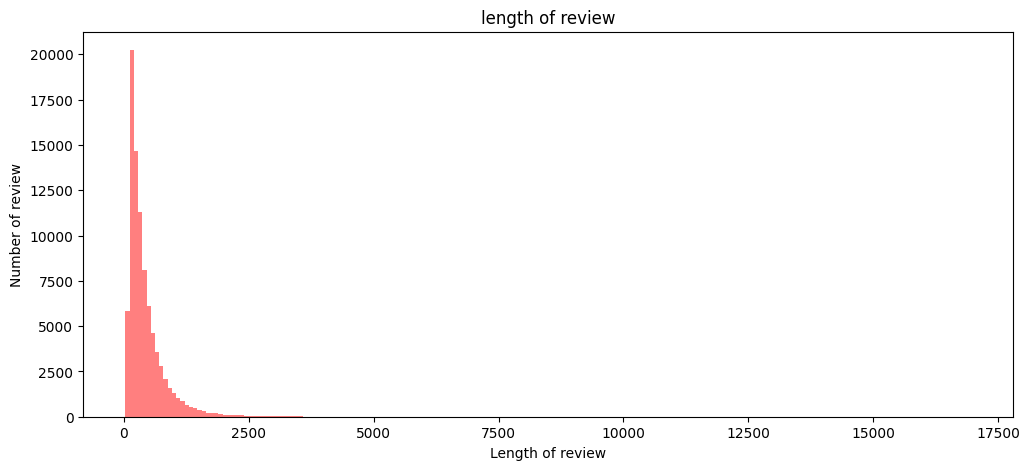

In [17]:
plt.figure(figsize=(12,5))
plt.hist(review_length, bins=200, alpha=0.5, color='r', label='word')

plt.title('length of review')

plt.xlabel('Length of review')

plt.ylabel('Number of review')

Text(0, 0.5, 'Number of summary')

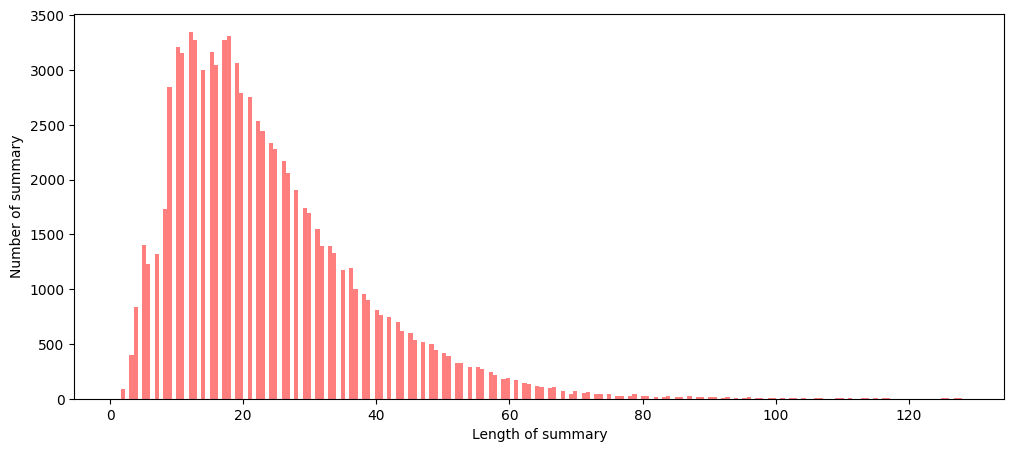

In [18]:
plt.figure(figsize=(12,5))
plt.hist(summary_length, bins=200, alpha=0.5, color='r', label='word')

plt.xlabel('Length of summary')

plt.ylabel('Number of summary')

(-0.5, 799.5, 599.5, -0.5)

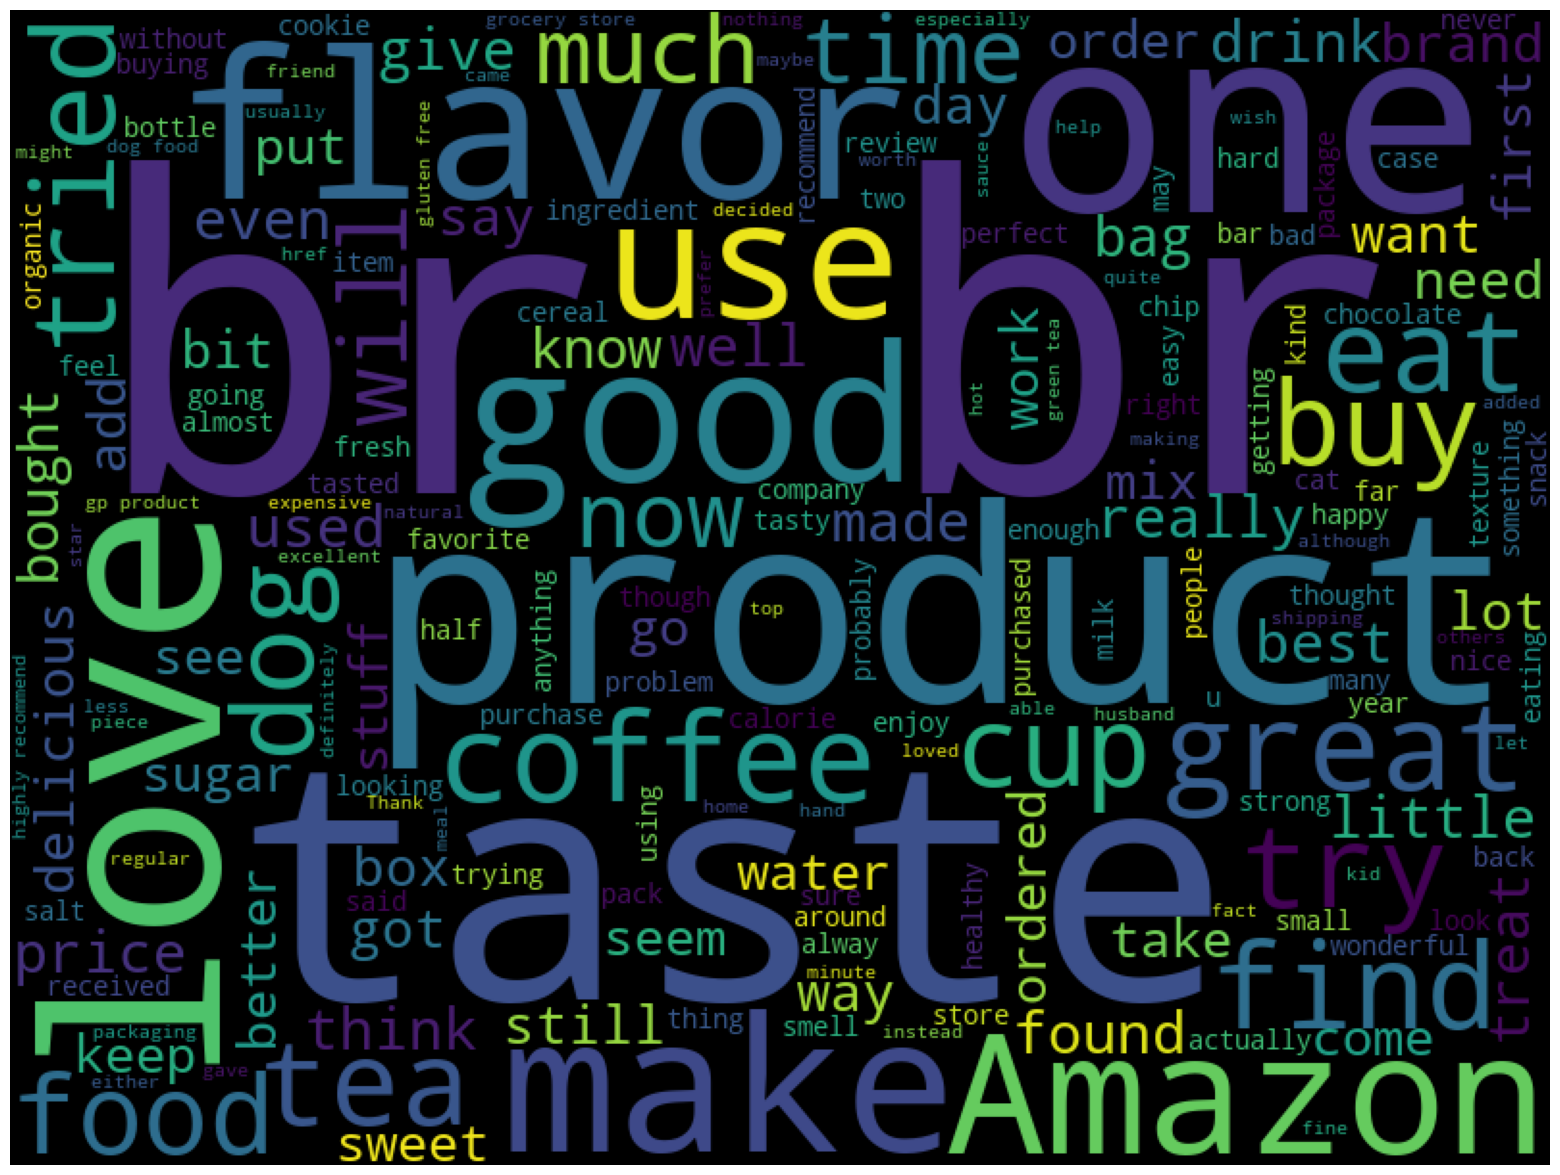

In [19]:
from wordcloud import WordCloud
cloud=WordCloud(width=800, height=600).generate(" ".join(data['Text']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')